## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Paulo Roberto Alves de Carvalho Junior

#### Os datasets são bastante interessantes e algumas descobertas confirmaram ideias do senso comum (tipos de filmes mais vistos, com mais votos, comportamente das medias de notas etc). Com um tratamento melhor dos dados (definição de critérios para remoção de outliers, por exemplo), há como fazer análises mais profundas e até brincar com predições, apesar de que não faria muito sentido utilizar somente médias e total de votos. Enfim, um exercício interessante.

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Science da www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
# !pip install pandas=="0.24.0" --quiet
# !pip install seaborn=="0.9.0" --quiet
# !pip install scipy=="1.2.0" --quiet

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
sns.set()
print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.24.2
Usando seaborn 0.9.0
Usando scipy 1.2.1


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [3]:
# filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv")
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.set_index("filmeId", inplace=True)

In [4]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [5]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [6]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [7]:
# notas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv")
notas = pd.read_csv("ratings.csv")
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

In [8]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [9]:
filmes["nota_media"] = notas.groupby("filmeId").mean()["nota"]

In [10]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [11]:
total_de_votos = notas.groupby("filmeId").count()
total_de_votos.head()

,usuarioId,nota,momento
filmeId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49


In [12]:
filmes["total_de_votos"] = notas.groupby("filmeId").count()["nota"]
filmes1=filmes
filmes1["total_de_votos"] = notas.groupby("filmeId").count()["nota"]
filmes = filmes.query("total_de_votos > 49")

In [13]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

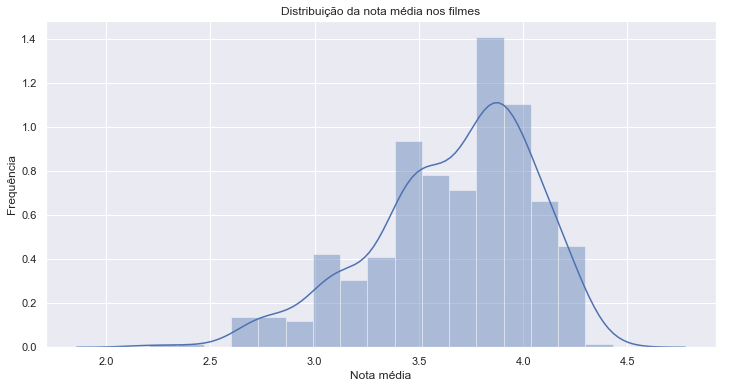

In [14]:
ax = sns.distplot(filmes["nota_media"])
ax.set(xlabel="Nota média", ylabel="Frequência")
ax.set_title("Distribuição da nota média nos filmes")
ax.figure.set_size_inches(12,6)

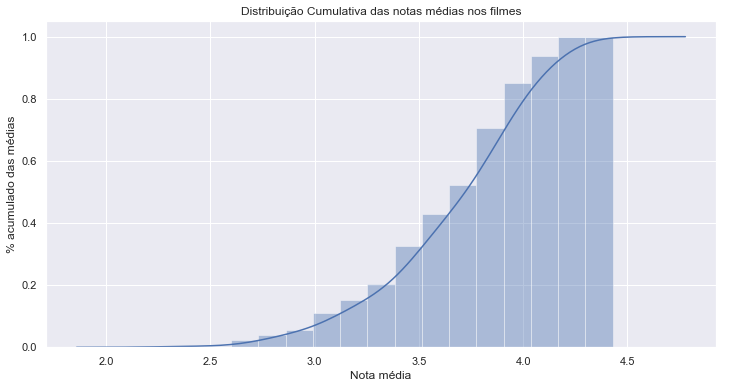

In [15]:
ax = sns.distplot(filmes["nota_media"],hist_kws ={"cumulative":True},kde_kws ={"cumulative":True})
ax.set(xlabel="Nota média", ylabel="% acumulado das médias")
ax.set_title("Distribuição Cumulativa das notas médias nos filmes")
ax.figure.set_size_inches(12,6)

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

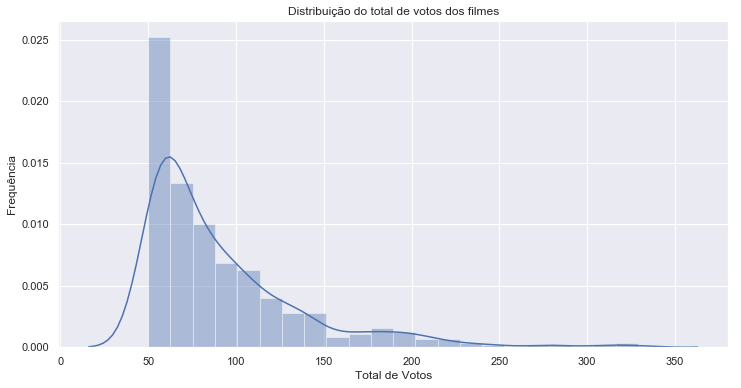

In [16]:
ax = sns.distplot(filmes["total_de_votos"])
ax.set(xlabel="Total de Votos", ylabel="Frequência")
ax.set_title("Distribuição do total de votos dos filmes")
ax.figure.set_size_inches(12,6)

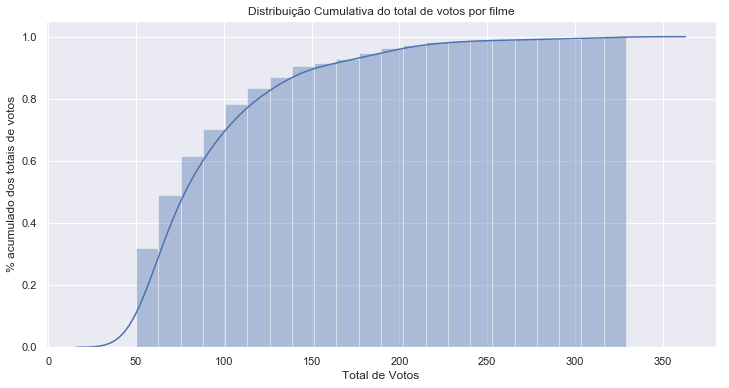

In [17]:
ax = sns.distplot(filmes["total_de_votos"],hist_kws ={"cumulative":True},kde_kws ={"cumulative":True})
ax.set(xlabel="Total de Votos", ylabel="% acumulado dos totais de votos")
ax.set_title("Distribuição Cumulativa do total de votos por filme")
ax.figure.set_size_inches(12,6)

In [18]:
filmes["total_de_votos"].quantile(0.8)

119.20000000000005

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [19]:
nota_limite_dos_20_porcento = filmes["nota_media"].quantile(0.8)

In [20]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [21]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


O:\Anaconda3\envs\aluraenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

In [23]:
qtde_filmes_por_genero = generos.sum()[0:len(generos)].sort_values(ascending=False)

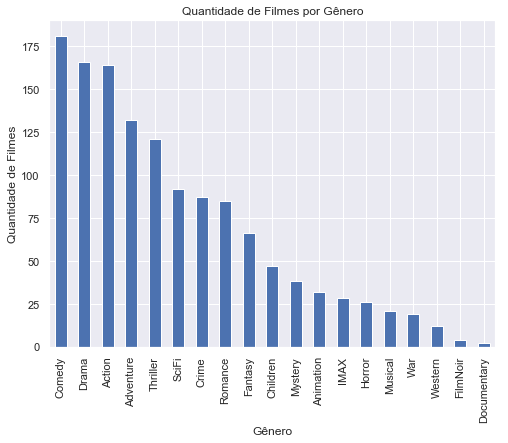

In [24]:
plt.figure(figsize=(8,6))
plt.xlabel("Gênero")
plt.ylabel("Quantidade de Filmes")
plt.title("Quantidade de Filmes por Gênero")
qtde_filmes_por_genero.plot.bar()

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [25]:
top5_generos_em_quantidade_de_filmes = qtde_filmes_por_genero.sort_values(ascending=False)[:5]


In [26]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [27]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [28]:
#Ordenando as categorias:
votos_ordenados = votos_por_genero_por_filme.sum().sort_values(ascending=False)
votos_ordenados

Action         15734.0
Drama          15445.0
Comedy         15330.0
Adventure      13117.0
Thriller       11907.0
SciFi           8989.0
Crime           8649.0
Romance         7444.0
Fantasy         5993.0
Children        4331.0
Mystery         3452.0
Animation       3066.0
IMAX            2492.0
Horror          2215.0
War             2113.0
Musical         1822.0
Western          900.0
FilmNoir         291.0
Documentary      108.0
dtype: float64

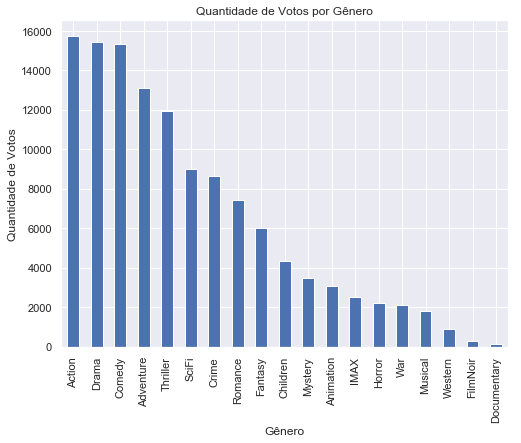

In [29]:
plt.figure(figsize=(8,6))
plt.xlabel("Gênero")
plt.ylabel("Quantidade de Votos")
plt.title("Quantidade de Votos por Gênero")
votos_ordenados.plot.bar()


## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [30]:
filmes_votos_por_genero = pd.DataFrame([qtde_filmes_por_genero,votos_ordenados], index=["Qtde Filmes", "Qtde Votos"]).T
filmes_votos_por_genero["Votos/Filme"] = filmes_votos_por_genero["Qtde Votos"]/filmes_votos_por_genero["Qtde Filmes"]
filmes_votos_por_genero["Votos/Filme"].sort_values(ascending=False)

War            111.210526
Crime           99.413793
Adventure       99.371212
Thriller        98.404959
SciFi           97.706522
Action          95.939024
Animation       95.812500
Drama           93.042169
Children        92.148936
Mystery         90.842105
Fantasy         90.803030
IMAX            89.000000
Romance         87.576471
Musical         86.761905
Horror          85.192308
Comedy          84.696133
Western         75.000000
FilmNoir        72.750000
Documentary     54.000000
Name: Votos/Filme, dtype: float64

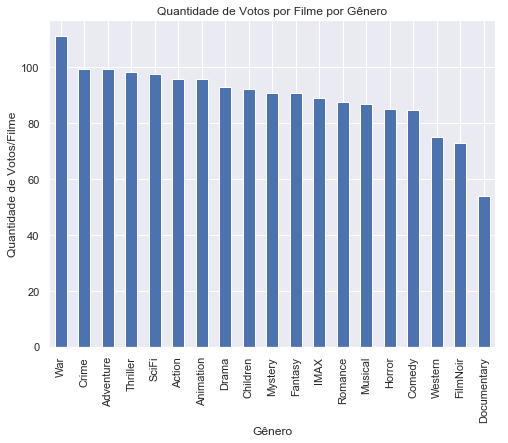

In [31]:
plt.figure(figsize=(8,6))
plt.xlabel("Gênero")
plt.ylabel("Quantidade de Votos/Filme")
plt.title("Quantidade de Votos por Filme por Gênero")
filmes_votos_por_genero["Votos/Filme"].sort_values(ascending=False).plot.bar()


## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):

O gênero war, embora seja 16º em quantidade de filmes e 15º em quantidade de votos, é o que possui a maior relação de votos/filme, num total de 111.210526. A categoria action, embora seja a 3ª em quantidade de filmes e 1ª em quantidade total de votos, é apenas a 6ª colocada com relação votos/filme de 95.939024.
    
    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

Text(0.5, 1.0, 'Distribuição dos votos de acordo com gêneros')

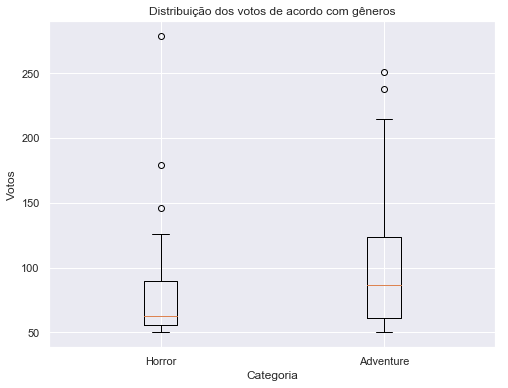

In [32]:
plt.figure(figsize=(8,6))
plt.boxplot([filmes.query("Horror == 1")["total_de_votos"],
             filmes.query("Adventure == 1")["total_de_votos"]],labels=["Horror","Adventure"])
plt.xlabel("Categoria")
plt.ylabel("Votos")
plt.title("Distribuição dos votos de acordo com gêneros")

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

Text(0.5, 1.0, 'Distribuição dos votos de acordo com gêneros')

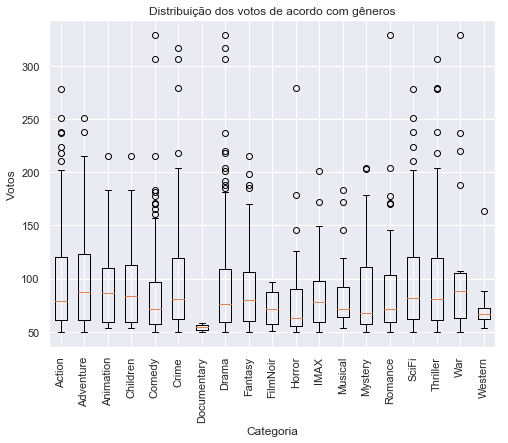

In [33]:
plt.figure(figsize=(8,6))
plt.boxplot([filmes.query("Action == 1")["total_de_votos"],
             filmes.query("Adventure == 1")["total_de_votos"],
            filmes.query("Animation == 1")["total_de_votos"],
            filmes.query("Children == 1")["total_de_votos"],
            filmes.query("Comedy == 1")["total_de_votos"],
            filmes.query("Crime == 1")["total_de_votos"],
            filmes.query("Documentary == 1")["total_de_votos"],
            filmes.query("Drama == 1")["total_de_votos"],
            filmes.query("Fantasy == 1")["total_de_votos"],
            filmes.query("FilmNoir == 1")["total_de_votos"],
            filmes.query("Horror == 1")["total_de_votos"],
             filmes.query("IMAX == 1")["total_de_votos"],
             filmes.query("Musical == 1")["total_de_votos"],
             filmes.query("Mystery == 1")["total_de_votos"],
             filmes.query("Romance == 1")["total_de_votos"],
             filmes.query("SciFi == 1")["total_de_votos"],
             filmes.query("Thriller == 1")["total_de_votos"],
             filmes.query("War == 1")["total_de_votos"],
             filmes.query("Western == 1")["total_de_votos"]
            ],labels=generos.columns)
plt.xlabel("Categoria")
plt.ylabel("Votos")
plt.xticks(rotation=90)
plt.title("Distribuição dos votos de acordo com gêneros")


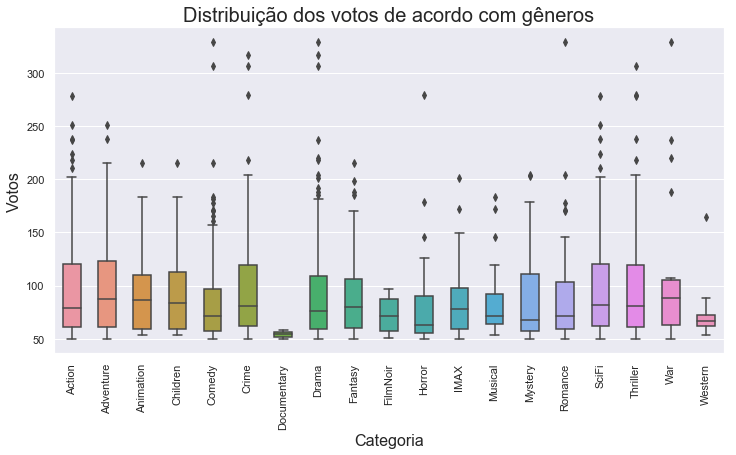

In [34]:
queries = pd.DataFrame([])
for i in range(0,len(generos.columns)):
    categoria = generos.columns[i]
    s1 = pd.DataFrame({"total_de_votos":filmes.query(categoria+" == 1")["total_de_votos"],"categoria":categoria})
    queries = queries.append(s1)
ax = sns.boxplot(x="categoria", y="total_de_votos", data=queries, width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição dos votos de acordo com gêneros', fontsize=20)
ax.set_xlabel('Categoria', fontsize=16)
ax.set_ylabel('Votos', fontsize=16)
plt.xticks(rotation=90)
sns.set()

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:

Tanto a média quanto a mediana do total de votos recebidos por filme para o gênero Adventure são ligeiramente maiores que para o gênero Horror.

Analisando a nota média recebida pelos filmes, percebe-se que são parecidas também. Ocorre que o gênero Adventure possui cerca de 5 vezes mais filmes que receberam votos, indicando mais consistência neste dataset.

Considerando estes dados, eu escolheria o gênero Adventure.

In [35]:
print("Horror \n {0}".format(filmes.query("Horror == 1")["nota_media"].describe()))
print("Adventure \n {0}".format(filmes.query("Adventure == 1")["nota_media"].describe()))

Horror 
 count    26.000000
mean      3.610527
std       0.419267
min       2.796875
25%       3.346470
50%       3.707704
75%       3.972898
max       4.161290
Name: nota_media, dtype: float64
Adventure 
 count    132.000000
mean       3.615373
std        0.392217
min        2.645455
25%        3.373580
50%        3.693742
75%        3.904919
max        4.232394
Name: nota_media, dtype: float64


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

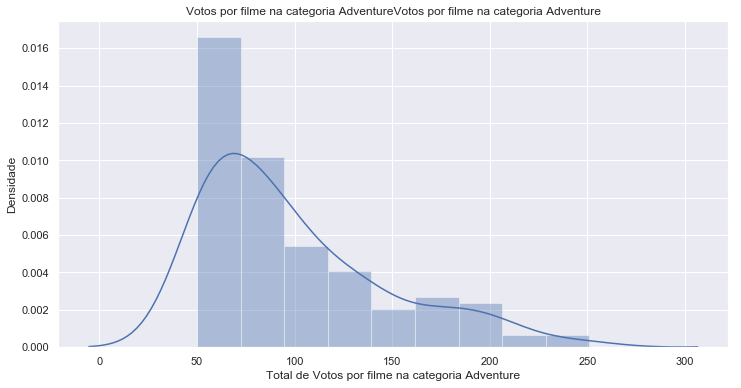

In [36]:
ax = sns.distplot(filmes.query("Adventure == 1")["total_de_votos"])
ax.set(xlabel="Total de Votos por filme na categoria Adventure", ylabel="Densidade")
ax.set_title("Votos por filme na categoria AdventureVotos por filme na categoria Adventure")
ax.figure.set_size_inches(12,6)

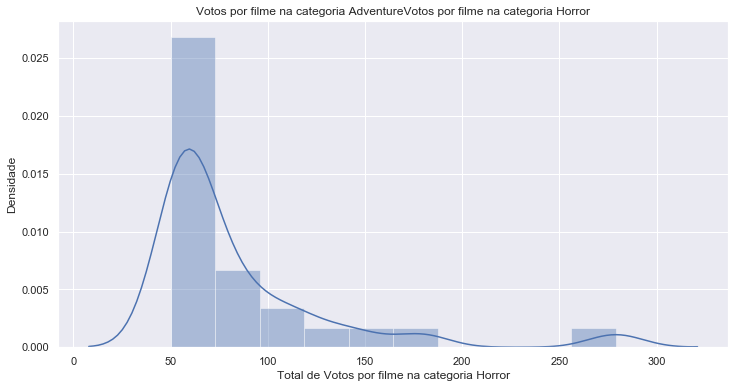

In [37]:
ax = sns.distplot(filmes.query("Horror == 1")["total_de_votos"])
ax.set(xlabel="Total de Votos por filme na categoria Horror", ylabel="Densidade")
ax.set_title("Votos por filme na categoria AdventureVotos por filme na categoria Horror")
ax.figure.set_size_inches(12,6)


In [38]:
from scipy.stats import normaltest, ranksums

_,p = normaltest(filmes.query("Adventure == 1")["total_de_votos"])
_,p1 = normaltest(filmes.query("Horror == 1")["total_de_votos"])

print("Para o gênero Adventure, p = {0}".format(p))
print("Para o gênero Horror, p = {0}".format(p1))

Para o gênero Adventure, p = 5.987863006199139e-06
Para o gênero Horror, p = 1.2786148884334685e-07


Considerando que o normaltest considera a hipótese nula H0 sendo a distribuição testada vindo de uma normal e ambas deram um valor muito abaixo do comumente utilizado 0.05, não podemos rejeitar H0, ou seja, nenhuma das duas distribuições vêm de uma normal. Assim sendo, utilizaremos a função ranksums().

In [39]:
stat,p = ranksums(filmes.query("Horror == 1")["total_de_votos"],filmes.query("Adventure == 1")["total_de_votos"])
p


0.04782366231999856

### Solução (explique sua conclusão):

#### Não foi possível rejeitar a H0 em nenhum dos dois testes. Dessa forma, não há como fazer testes confiáveis utilizando a variável total_de_votos para essas amostras.

## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

Text(0.5, 1.0, 'Distribuição das notas médias de acordo com gêneros')

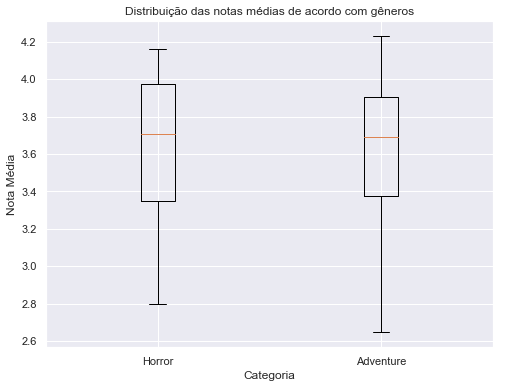

In [40]:
plt.figure(figsize=(8,6))
plt.boxplot([filmes.query("Horror == 1")["nota_media"],
             filmes.query("Adventure == 1")["nota_media"]],labels=["Horror","Adventure"])
plt.xlabel("Categoria")
plt.ylabel("Nota Média")
plt.title("Distribuição das notas médias de acordo com gêneros")

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:

Nesse caso eu escolheria o gênero Horror, visto que a mediana e o terceiro quartil são ligeiramente superiores à do gênero adventure e o primeiro quartil não é tão significativamente inferior.

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

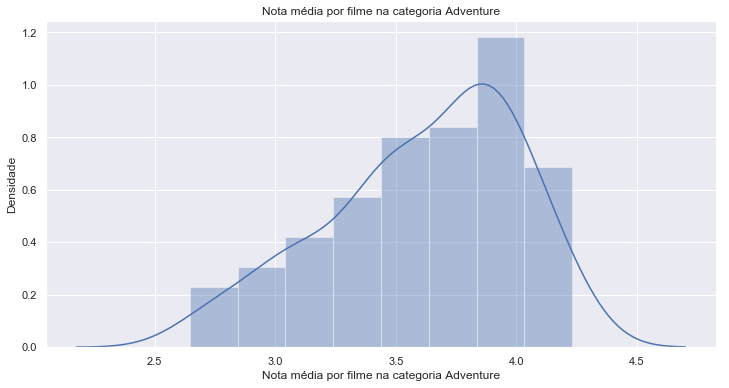

In [41]:
ax = sns.distplot(filmes.query("Adventure == 1")["nota_media"])
ax.set(xlabel="Nota média por filme na categoria Adventure", ylabel="Densidade")
ax.set_title("Nota média por filme na categoria Adventure")
ax.figure.set_size_inches(12,6)

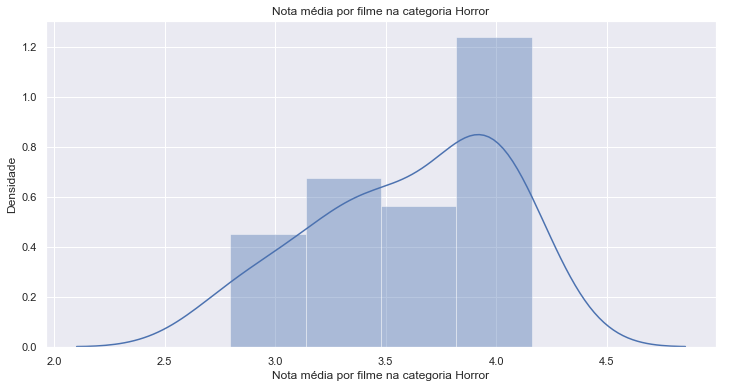

In [42]:
ax = sns.distplot(filmes.query("Horror == 1")["nota_media"])
ax.set(xlabel="Nota média por filme na categoria Horror", ylabel="Densidade")
ax.set_title("Nota média por filme na categoria Horror")
ax.figure.set_size_inches(12,6)


In [43]:
_,p = normaltest(filmes.query("Adventure == 1")["nota_media"])
_,p1 = normaltest(filmes.query("Horror == 1")["nota_media"])

print("Para o gênero Adventure, p = {0}".format(p))
print("Para o gênero Horror, p = {0}".format(p1))



Para o gênero Adventure, p = 0.012835697582553224
Para o gênero Horror, p = 0.21186284682483916


In [44]:
stat,p = ranksums(filmes.query("Horror == 1")["nota_media"],filmes.query("Adventure == 1")["nota_media"])
p

0.8310397344212459

## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:
Analisando somente a distribuição de notas médias, sim. Embora ligeiramente inferiores no limite superior, as notas do gênero Horror estão mais concentradas em médias um pouco maioresd que as da categoria adventure.

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:

Analisando as duas variáveis, minha escolha seria pelo gênero adventure. O sucesso de crítica poderá não ser tão grande como de horror (embora não muito diferente), mas certamente será mais popular.

## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [45]:
filmes_votos_por_genero

,Qtde Filmes,Qtde Votos,Votos/Filme
Comedy,181.0,15330.0,84.696133
Drama,166.0,15445.0,93.042169
Action,164.0,15734.0,95.939024
Adventure,132.0,13117.0,99.371212
Thriller,121.0,11907.0,98.404959
SciFi,92.0,8989.0,97.706522
Crime,87.0,8649.0,99.413793
Romance,85.0,7444.0,87.576471
Fantasy,66.0,5993.0,90.803030
Children,47.0,4331.0,92.148936


In [46]:
filmes_votos_por_genero.sort_values(by=["Votos/Filme"],ascending=False)[0:2]

,Qtde Filmes,Qtde Votos,Votos/Filme
War,19.0,2113.0,111.210526
Crime,87.0,8649.0,99.413793


In [47]:
filmes.query("War == 1 | Crime == 1").sort_values(by=["nota_media"],ascending=False)[0:5]

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
318,"Shawshank Redemption, The (1994)",1994.0,4.429022,317.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
858,"Godfather, The (1972)",1972.0,4.289062,192.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2959,Fight Club (1999),1999.0,4.272936,218.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
750,Dr. Strangelove or: How I Learned to Stop Worr...,1964.0,4.268041,97.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1221,"Godfather: Part II, The (1974)",1974.0,4.259690,129.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [48]:
filmes.corr().sort_values(by="nota_media",ascending=False)["nota_media"]

nota_media           1.000000
total_de_votos       0.342584
Drama                0.277662
Crime                0.190220
Mystery              0.129914
War                  0.125615
FilmNoir             0.081766
IMAX                 0.064931
Animation            0.043071
Documentary         -0.003486
Musical             -0.008529
Thriller            -0.016782
Fantasy             -0.020986
Children            -0.030360
Horror              -0.033877
Western             -0.059642
Romance             -0.072002
Adventure           -0.079985
SciFi               -0.136717
Action              -0.154089
ano_de_lancamento   -0.159146
Comedy              -0.256005
Name: nota_media, dtype: float64

## Pergunta: Quais são os 2 generos com maior correlação com `total_de_votos`? E quais os 2 com menor correlação com `total_de_votos`?

In [49]:
filmes.corr().sort_values(by="total_de_votos",ascending=False)["total_de_votos"]

total_de_votos       1.000000
nota_media           0.342584
Adventure            0.104380
War                  0.087999
Thriller             0.085525
Crime                0.079766
Action               0.066239
SciFi                0.063802
Animation            0.023442
Drama                0.018779
Children             0.001764
Mystery             -0.007051
Fantasy             -0.009976
IMAX                -0.016285
Musical             -0.024741
ano_de_lancamento   -0.028709
Horror              -0.036132
FilmNoir            -0.039408
Romance             -0.045427
Documentary         -0.055010
Western             -0.060789
Comedy              -0.128527
Name: total_de_votos, dtype: float64

## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

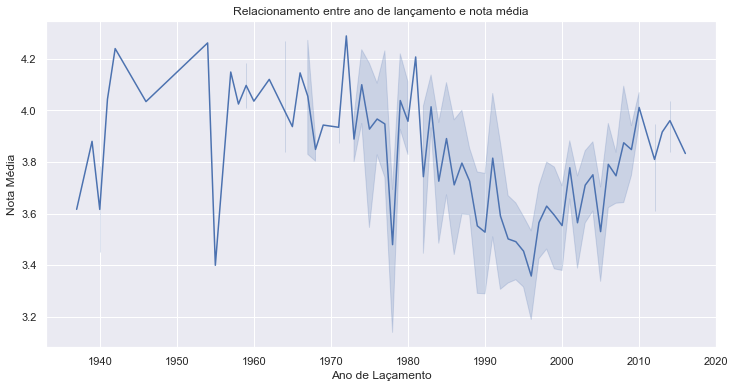

In [50]:
ax = sns.lineplot(x="ano_de_lancamento", y="nota_media", data=filmes)
ax.set(xlabel="Ano de Laçamento", ylabel="Nota Média")
ax.set_title("Relacionamento entre ano de lançamento e nota média")
ax.figure.set_size_inches(12,6)

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [51]:
filmes[["ano_de_lancamento","nota_media"]].corr()

,ano_de_lancamento,nota_media
ano_de_lancamento,1.000000,-0.159146
nota_media,-0.159146,1.000000


### Solução (explicação)

Existe uma ligeira correlação negativa entre as duas variáveis. Em tese, quanto menor o ano de lancamento, maior seria sua média. Analisando apenas correlação, poderíamos chegar à falsa conclusão de que um filme receberá uma nota menor exclusivamente porque foi lançado em tal ano, sendo que não há como afirmar que este é um fator determinante.

## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

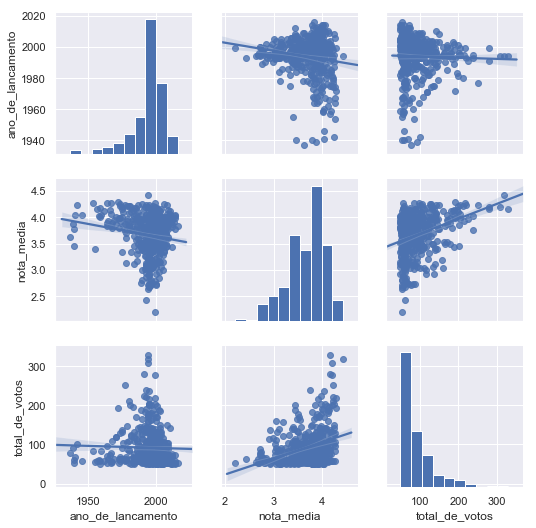

In [52]:
infos = filmes[["ano_de_lancamento", "nota_media" , "total_de_votos"]]
sns.pairplot(infos,kind="reg")
ax.figure.set_size_inches(15,8)

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

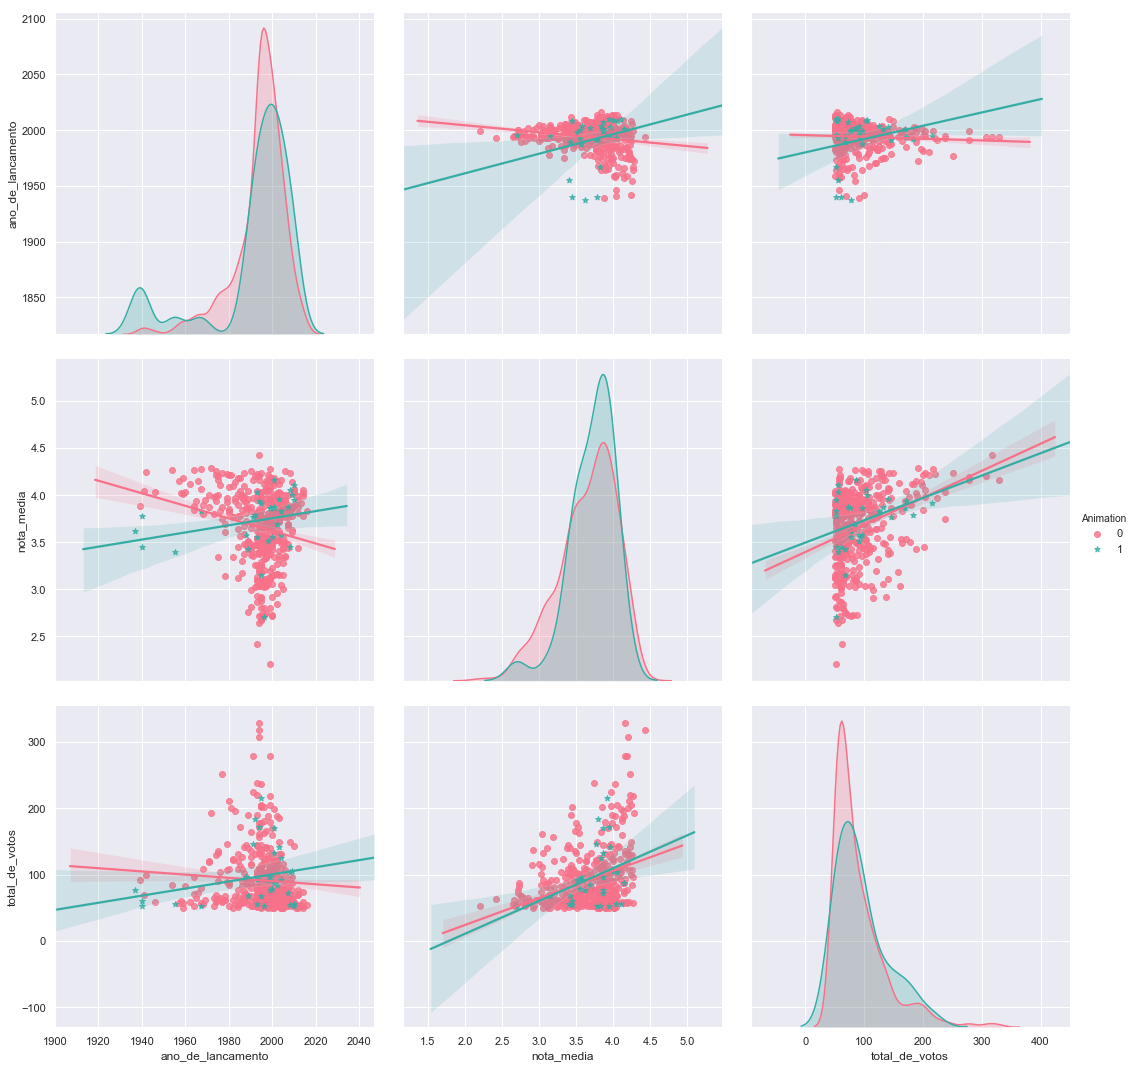

In [53]:
ax = sns.pairplot(filmes,x_vars=["ano_de_lancamento", "nota_media" , "total_de_votos"],
             y_vars=["ano_de_lancamento", "nota_media" , "total_de_votos"],hue="Animation",
             markers=["o","*"],kind="reg", palette="husl",height=5)
ax

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

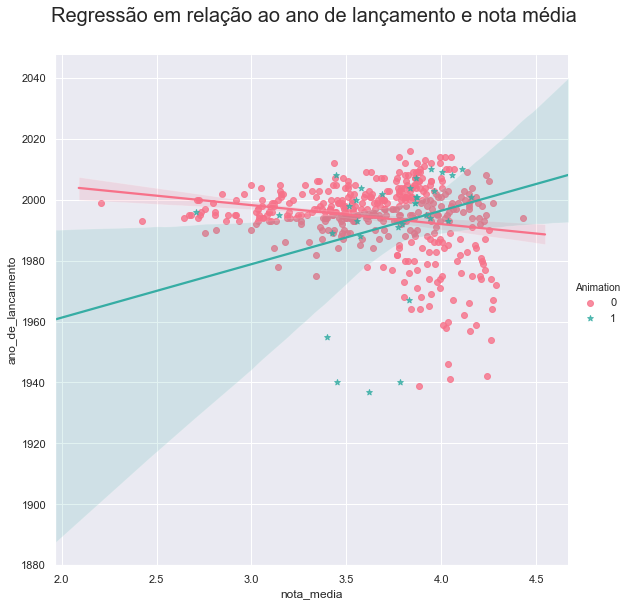

In [54]:
ax = sns.pairplot(data=filmes,x_vars="nota_media",
             y_vars="ano_de_lancamento",kind="reg",hue="Animation", palette="husl",height=8,markers=["o","*"])
ax.fig.suptitle("Regressão em relação ao ano de lançamento e nota média",fontsize=20, y=1.05)
ax

### Solução:
Não parece haver linearidade dos anos ~70 e anteriores e parece haver pouca linearidade a partir do momento em que houve mais lançamentos de filmes do gênero (~1980). Esse gênero se comporta bem diferente (de forma reversa) da reta de regressão dos demais.


## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

## Verificarei se existe algo interessante na evolução anual de produção dos filmes e suas categorias (Apenas as 6 maiores)

In [55]:
filme_por_categoria_por_ano = filmes.groupby("ano_de_lancamento").sum()
filme_por_categoria_por_ano.drop(['nota_media','total_de_votos'],axis=1, inplace=True)
top5 = filme_por_categoria_por_ano[["Comedy","Drama","Action","Adventure","Thriller","SciFi"]]
top5.T

ano_de_lancamento,1937.0,1939.0,1940.0,1941.0,1942.0,1946.0,1954.0,1955.0,1957.0,1958.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2016.0
Comedy,0,0,0,0,0,0,0,1,0,0,...,2,5,1,2,1,0,0,1,1,1
Drama,1,0,0,1,1,1,0,0,1,1,...,6,5,2,2,4,1,2,1,2,0
Action,0,0,0,0,0,0,0,0,0,0,...,6,5,3,5,1,1,5,0,1,1
Adventure,0,1,0,0,0,0,0,0,0,0,...,5,2,2,4,2,1,4,0,1,1
Thriller,0,0,0,0,0,0,1,0,0,1,...,8,2,0,2,2,0,2,0,1,0
SciFi,0,0,0,0,0,0,0,0,0,0,...,4,1,2,3,1,0,2,0,2,1


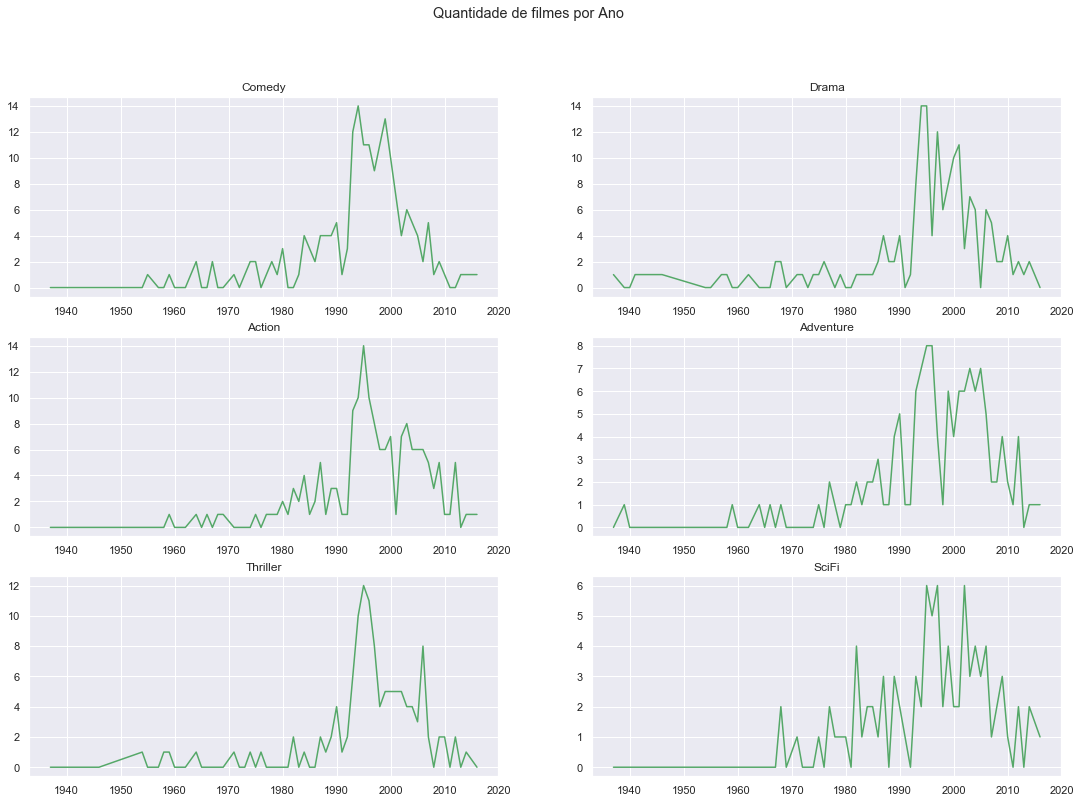

In [56]:
fig, ax = plt.subplots(nrows=int(len(top5.columns)/2),ncols=2)
fig.subplots_adjust()
fig.set_size_inches(18.5, 12.5)
fig.suptitle('Quantidade de filmes por Ano')
for axe, i in zip(ax.flatten(),range(0,len(top5.columns))):
    sns.lineplot(data=top5[top5.columns[i]],color='g',ax=axe)
    axe.set(title=top5.columns[i])


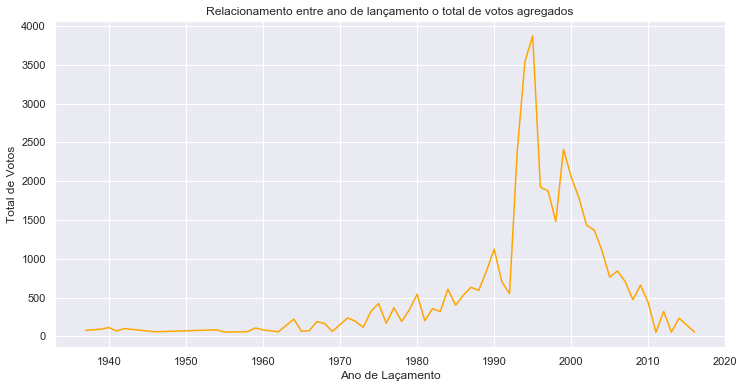

In [57]:
votos_por_ano = filmes.groupby("ano_de_lancamento").sum()
votos_por_ano.drop(['nota_media'],axis=1, inplace=True)
ax = sns.lineplot(x=votos_por_ano.index,y=votos_por_ano["total_de_votos"],data=votos_por_ano,color="orange")
ax.set(xlabel="Ano de Laçamento", ylabel="Total de Votos")
ax.set_title("Relacionamento entre ano de lançamento o total de votos agregados")
ax.figure.set_size_inches(12,6)

### Pelos dois últimos gráficos pode-se perceber que a concentração dos votos em todas as 6 principais categorias está basicamente na década de 90. O mesmo comportamento pode ser visto no relacionamento agregado do último gráfico. Pode ser apenas uma cartacterística do dataset ou de fato os anos 90 produziram os melhores filmes =)